### Run this cell before the others

In [1]:
# Must contain this cell, in order to import from other folders
import os
import sys
sys.path.append(os.getcwd() + '/..')

%reload_ext autoreload
%autoreload 2

### EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'


In [3]:
from utils.data import get_train_valid_sets

train_set, valid_set = get_train_valid_sets(0)

In [4]:
train_set

user_id                original_image  face_id        age gender  \
0      114841417@N06  12068804204_085d553238_o.jpg      481  (60, 100)      f   
1      114841417@N06  12068804204_085d553238_o.jpg      482   (48, 53)      m   
2      114841417@N06  12078357226_5fdd9367de_o.jpg      483     (4, 6)      f   
3      114841417@N06  12019067874_0e988248af_o.jpg      483     (4, 6)      f   
4      114841417@N06  12077009614_2490487d2a_o.jpg      484         45      f   
...              ...                           ...      ...        ...    ...   
14881    7153718@N04  11598838386_349a0d4849_o.jpg     2282        NaN    NaN   
14882    7153718@N04  11598166203_c70bb34c80_o.jpg     2283        NaN    NaN   
14883    7153718@N04  11598166203_c70bb34c80_o.jpg     2282        NaN    NaN   
14884    7153718@N04  11598145163_733cb99713_o.jpg     2282        NaN    NaN   
14885    7153718@N04  11598013005_240c2bc9c7_o.jpg     2282        NaN    NaN   

          x     y    dx    dy  tilt_ang  fiducial_yaw_angle  fiducial_score  
0      1141   780   975   976         0                   0             118  
1      1821   283   969   969       -25                  15              35  
2      1788   341   306   306       -10                   0             168  
3         3   183   932   777      -115                   0              27  
4       258   133  1734  1734        15                   0              11  
...     ...   ...   ...   ...       ...                 ...             ...  
14881   596   460  1472  1473       -75                   0              30  
14882  1179   755   331   331         5                   0             108  
14883  1201  1179   293   293         5                   0              99  
14884  1027   946   408   408       -85                   0              49  
14885   498   643   772   772       -80                   0             111  

[14886 rows x 12 columns]

#### Display random images

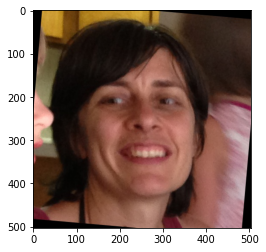

In [12]:
from utils.data import get_image

rand_index = np.random.choice(len(train_set))
instance = train_set.iloc[rand_index]

image = get_image(instance)
plt.imshow(image);

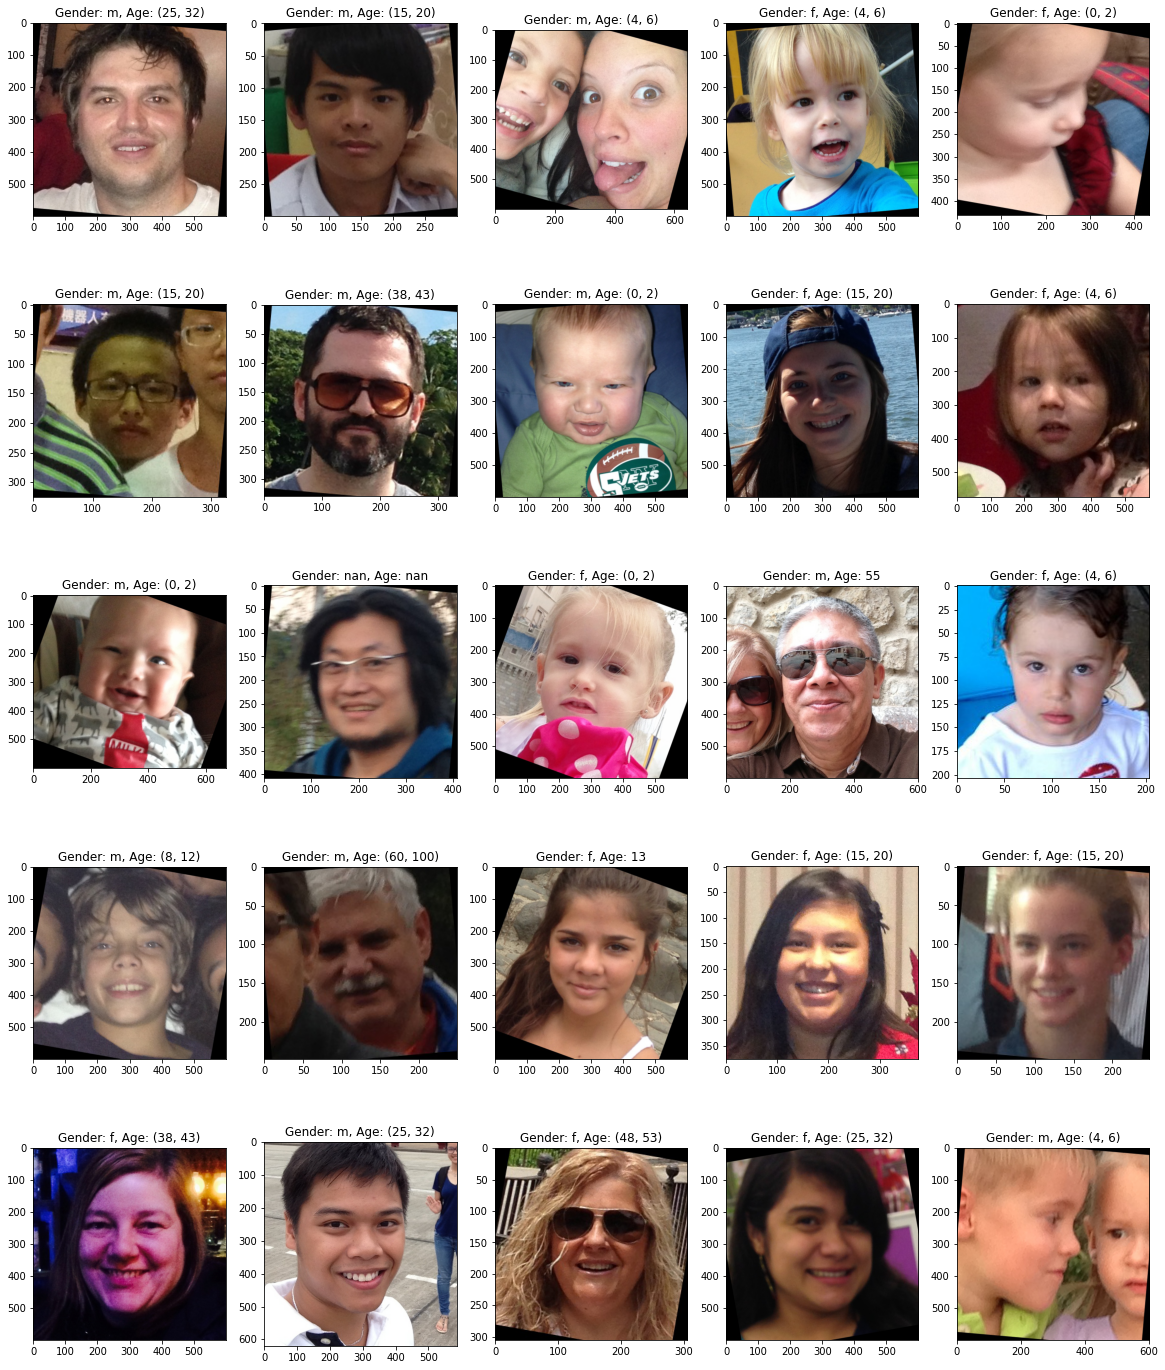

In [6]:
from utils.visuals import display_n_images

display_n_images(train_set, n_rows=5, n_columns=5)

### EDA - Age column

* Check what is the ratio between male and female
* Check if we have black people
* Check Age/Gender distribution
* Check columns which have NaN

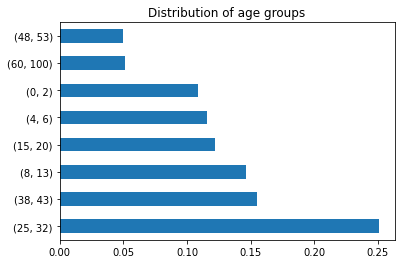

In [277]:
from models.age_model.utils import preprocess_metadata

clean_age_set = preprocess_metadata(train_set)

age_groups = clean_age_set['age'].value_counts() / len(clean_age_set)
age_groups.plot.barh(title='Distribution of age groups');

### EDA - Gender

In [10]:
from models.gender_model.utils import preprocess_metadata

clean_gender_set = preprocess_metadata(train_set)
clean_gender_set.head()

user_id                original_image  face_id        age gender  \
0  114841417@N06  12068804204_085d553238_o.jpg      481  (60, 100)      f   
1  114841417@N06  12068804204_085d553238_o.jpg      482   (48, 53)      m   
2  114841417@N06  12078357226_5fdd9367de_o.jpg      483     (4, 6)      f   
3  114841417@N06  12019067874_0e988248af_o.jpg      483     (4, 6)      f   
4  114841417@N06  12077009614_2490487d2a_o.jpg      484         45      f   

      x    y    dx    dy  tilt_ang  fiducial_yaw_angle  fiducial_score  
0  1141  780   975   976         0                   0             118  
1  1821  283   969   969       -25                  15              35  
2  1788  341   306   306       -10                   0             168  
3     3  183   932   777      -115                   0              27  
4   258  133  1734  1734        15                   0              11

### Check faces of people with unknown gender

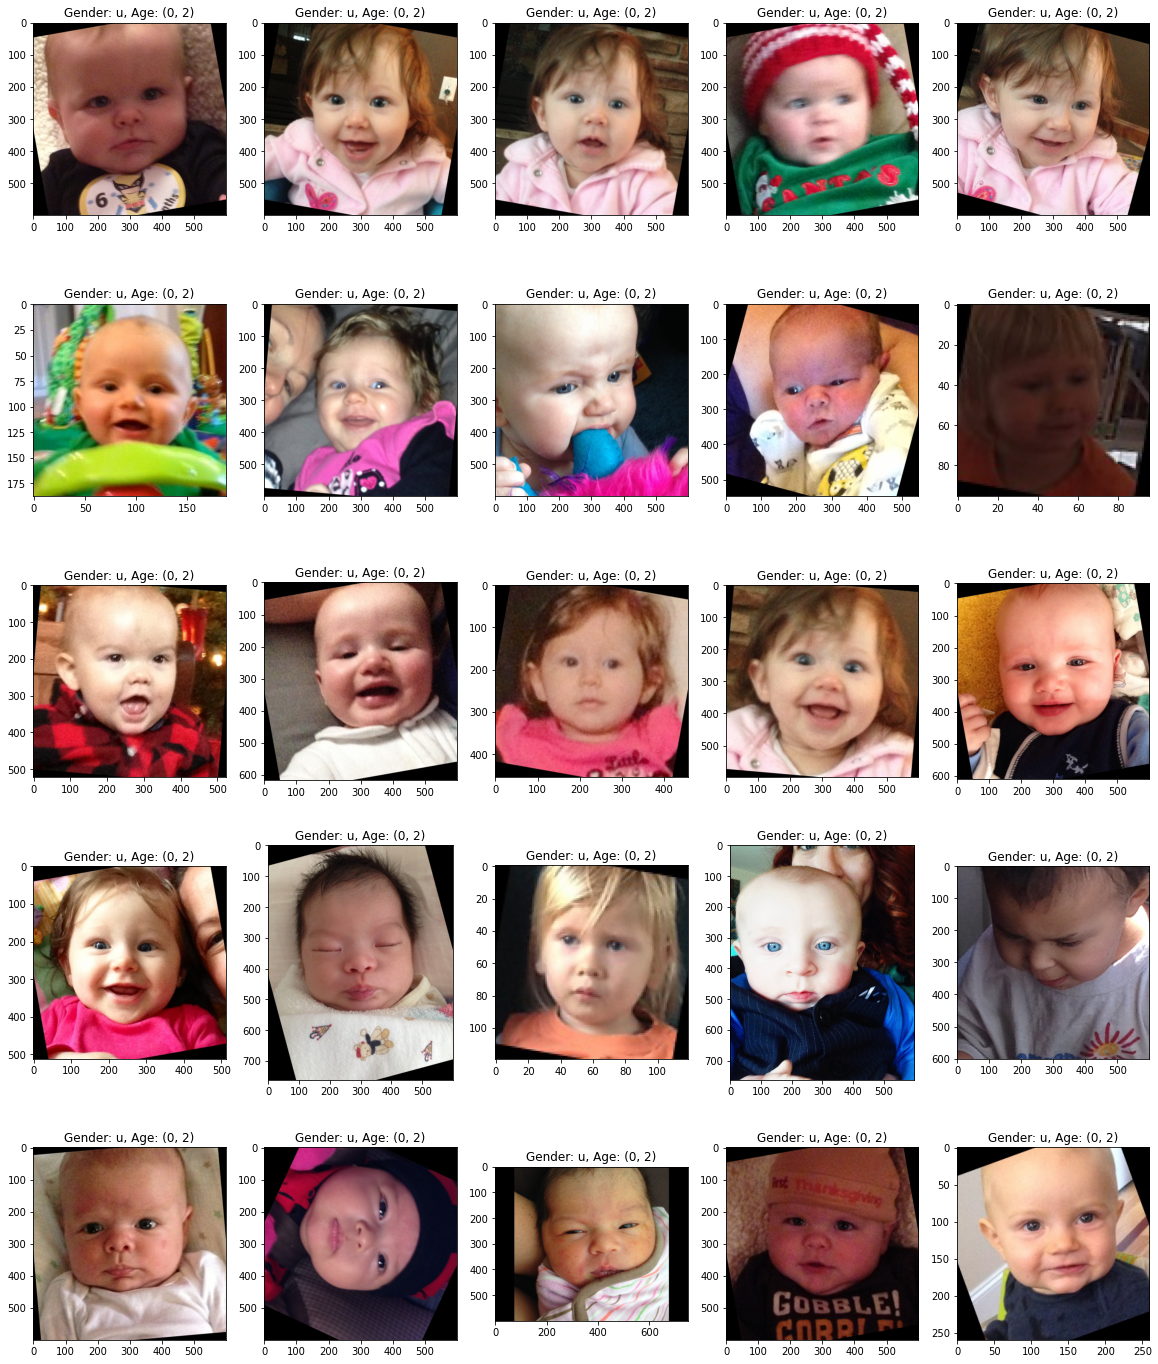

In [11]:
from utils.visuals import display_n_images

u_gender = clean_gender_set.loc[clean_gender_set['gender'] == 'u']

display_n_images(u_gender, n_rows=5, n_columns=5)

Looks like the majority of U gender are babies, which makes sense. It's hard to determine their genders, since they haven't developed their physical characteristics.